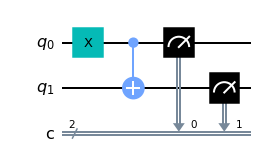

In [4]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) #2 qubits, 2 classical bits
# currently: 0,0
circuit.x(0)
# 2, 0
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit val if 1st qubitis 1
# 1,1
circuit.measure([0, 1], [0, 1]) #hypothetically, [cb1_value,cb2_value], [qb1_value, qb2_value] or 1:1
# circuit.draw()
circuit.draw(output="mpl")

In [5]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [8]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())

configrc.store_credentials:WARNING:2020-12-12 22:15:29,956: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()

C:\Users\Shadow\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider("ibm-q")
    
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 300 queued and 5 qubits
ibmq_16_melbourne has 2289 queued and 15 qubits
ibmq_vigo has 905 queued and 5 qubits
ibmq_ourense has 913 queued and 5 qubits
ibmq_valencia has 207 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_athens has 17 queued and 5 qubits
ibmq_santiago has 10 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_santiago")
job = q.execute(circuit, backend=backend, shots=100)
job_monitor(job)

Job Status: job has successfully run


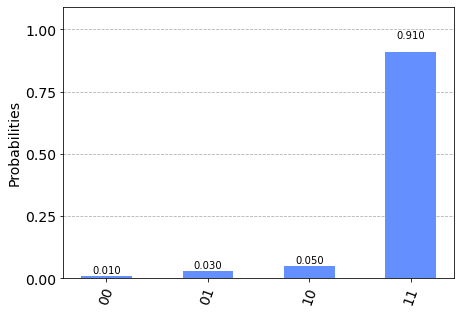

In [14]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

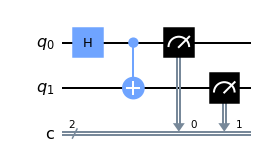

In [15]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit = q.QuantumCircuit(2,2) #2 qubits, 2 classical bits
# currently: 0,0
circuit.h(0)
# 2, 0
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit val if 1st qubitis 1
# 1,1
circuit.measure([0, 1], [0, 1]) #hypothetically, [cb1_value,cb2_value], [qb1_value, qb2_value] or 1:1
# circuit.draw()
circuit.draw(output="mpl")

In [16]:
job = q.execute(circuit, backend=backend, shots=100)
job_monitor(job)

Job Status: job has successfully run


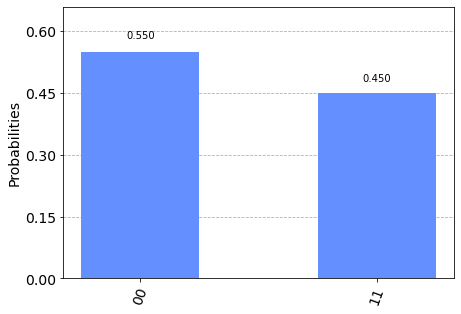

In [17]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
from qiskit import Aer #simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


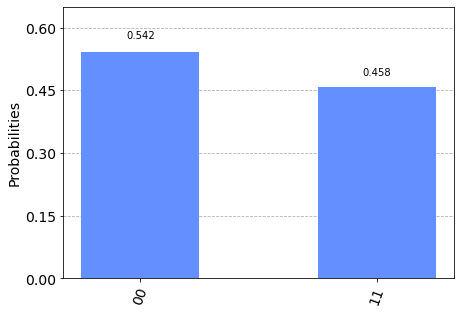

In [19]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])